# Star Wars Script Data Visualization

Star Wars is a popular film franchise that takes place in a galaxy far, far away. This is a collection of script dialogue between characters for the first three movies (episodes 4-6). Since it's a holiday (and just because Star Wars is an awesome movie), this data should serve as a fun way to implement text mining and linguistics.

### Content
SW_EpisodeIV.txt. Script from the Episode IV: A New Hope with columns character and dialogue.

SW_EpisodeV.txt. Script from the Episode V: The Empire Strikes Back with columns character and dialogue.

SW_EpisodeVI.txt. Script from the Episode VI: Return of the Jedi with columns character and dialogue.

wordcloud_masks.zip. Zip file including the masks used for the worclouds.


Link : https://www.kaggle.com/xvivancos/star-wars-movie-scripts

1 - Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
from operator import itemgetter
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from PIL import Image, ImageOps
import plotly.express as px
import plotly.io as pio
import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
%matplotlib inline

2 - Load txt files into Dataframe

In [4]:
EpisodeIV_df = pd.read_csv('files/SW_EpisodeIV.txt', 
                           sep=" ", 
                           header=None, 
                           names=["index","character","dialogue_script"] , 
                           )
EpisodeV_df = pd.read_csv('files/SW_EpisodeV.txt', 
                          sep=" ", 
                          header=None, 
                          names=["index","character","dialogue_script"] , 
                          )
EpisodeVI_df = pd.read_csv('files/SW_EpisodeVI.txt', 
                           sep=" ", 
                           header=None, 
                           names=["index","character","dialogue_script"] , 
                           )

3 - Show first 5 values of each dataframe

In [5]:
EpisodeIV_df.head()

,index,character,dialogue_script
0,character,dialogue,NaN
1,1,THREEPIO,Did you hear that? They've shut down the main...
2,2,THREEPIO,We're doomed!
3,3,THREEPIO,There'll be no escape for the Princess this time.
4,4,THREEPIO,What's that?


In [6]:
EpisodeV_df.head()

,index,character,dialogue_script
0,character,dialogue,NaN
1,1,LUKE,"Echo Three to Echo Seven. Han, old buddy, do y..."
2,2,HAN,"Loud and clear, kid. What's up?"
3,3,LUKE,"Well, I finished my circle. I don't pick up an..."
4,4,HAN,There isn't enough life on this ice cube to fi...


In [7]:
EpisodeVI_df.head()

,index,character,dialogue_script
0,character,dialogue,NaN
1,1,SHUTTLE CAPTAIN,"Command station, this is ST 321. Code Clearanc..."
2,2,DEATH STAR CONTROLLER,The security deflector shield will be deactiva...
3,3,SHUTTLE CAPTAIN,We're starting our approach.
4,4,OFFICER,Inform the commander that Lord Vader's shuttle...


4 - Show last 5 values of each dataframe

In [8]:
EpisodeIV_df.tail()

,index,character,dialogue_script
1006,1006,LUKE,"Oh, no!"
1007,1007,THREEPIO,"Oh, my! Artoo! Can you hear me? Say somethi..."
1008,1008,TECHNICIAN,We'll get to work on him right away.
1009,1009,THREEPIO,"You must repair him! Sir, if any of my circui..."
1010,1010,LUKE,He'll be all right.


In [9]:
EpisodeV_df.tail()

,index,character,dialogue_script
835,835,LUKE,I'll meet you at the rendezvous point on Tato...
836,836,LANDO,"Princess, we'll find Han. I promise."
837,837,LUKE,"Chewie, I'll be waiting for your signal."
838,838,LUKE,"Take care, you two. May the Force be with you."
839,839,LUKE,Ow!


In [10]:
EpisodeVI_df.tail()

,index,character,dialogue_script
670,670,LANDO,"Wedge, I don't think we're going to make it."
671,671,WEDGE,You'll make it. Just follow me Gold Leader.
672,672,LANDO,I promised to return his ship without a scratc...
673,673,HAN,Lando...
674,674,THREEPIO,They did it!


5 - Remove first value of each dataframe

In [11]:
EpisodeIV_df.drop(EpisodeIV_df.index[0], inplace=True)
EpisodeV_df.drop(EpisodeV_df.index[0], inplace=True)
EpisodeVI_df.drop(EpisodeVI_df.index[0], inplace=True)

6 - Start index from 0 of each dataframe

In [12]:
EpisodeIV_df.index = np.arange(0, len(EpisodeIV_df))
EpisodeV_df.index = np.arange(0, len(EpisodeV_df))
EpisodeVI_df.index = np.arange(0, len(EpisodeVI_df))

In [13]:
def pretend(np_array):
    return np.arange(0,len(np_array))

In [14]:
EpisodeVI_df['index'] = EpisodeVI_df.apply(pretend)
EpisodeV_df['index'] = EpisodeV_df.apply(pretend)
EpisodeVI_df['index'] = EpisodeVI_df.apply(pretend)

7 - Show each column information of each dataframe

In [15]:
EpisodeIV_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1009
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            1010 non-null   object
 1   character        1010 non-null   object
 2   dialogue_script  1010 non-null   object
dtypes: object(3)
memory usage: 31.6+ KB


In [16]:
EpisodeV_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 0 to 838
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            839 non-null    int32 
 1   character        839 non-null    object
 2   dialogue_script  839 non-null    object
dtypes: int32(1), object(2)
memory usage: 22.9+ KB


In [17]:
EpisodeVI_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 673
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            674 non-null    int32 
 1   character        674 non-null    object
 2   dialogue_script  674 non-null    object
dtypes: int32(1), object(2)
memory usage: 18.4+ KB


8 - Show how many variables there are in each dataframe

In [18]:
EpisodeIV_df.count()

index              1010
character          1010
dialogue_script    1010
dtype: int64

In [19]:
EpisodeV_df.count()

index              839
character          839
dialogue_script    839
dtype: int64

In [20]:
EpisodeVI_df.count()

index              674
character          674
dialogue_script    674
dtype: int64

9 - Show descriptive statistics of each dataframe

In [21]:
EpisodeIV_df.describe()

,index,character,dialogue_script
count,1010,1010,1010
unique,1010,60,981
top,639,LUKE,What?
freq,1,254,5


In [22]:
EpisodeV_df.describe()

,index
count,839.000000
mean,419.000000
std,242.342733
min,0.000000
25%,209.500000
50%,419.000000
75%,628.500000
max,838.000000


In [23]:
EpisodeVI_df.describe()

,index
count,674.000000
mean,336.500000
std,194.711325
min,0.000000
25%,168.250000
50%,336.500000
75%,504.750000
max,673.000000


10 - Define episode column for each dataframe and combine them into one dataframe

In [24]:
EpisodeIV_df["episode"]="A New Hope"
EpisodeV_df["episode"]="The Empire Strikes Back"
EpisodeVI_df["episode"]="Return of The Jedi"
starwars_df = pd.concat([EpisodeIV_df,EpisodeV_df,EpisodeVI_df],axis=0,ignore_index=True)

11 - Start index from 0 of the dataframe

In [25]:
starwars_df['index'] = starwars_df.apply(pretend)

In [26]:
starwars_df

,index,character,dialogue_script,episode
0,0,THREEPIO,Did you hear that? They've shut down the main...,A New Hope
1,1,THREEPIO,We're doomed!,A New Hope
2,2,THREEPIO,There'll be no escape for the Princess this time.,A New Hope
3,3,THREEPIO,What's that?,A New Hope
4,4,THREEPIO,I should have known better than to trust the l...,A New Hope
...,...,...,...,...
2518,2518,LANDO,"Wedge, I don't think we're going to make it.",Return of The Jedi
2519,2519,WEDGE,You'll make it. Just follow me Gold Leader.,Return of The Jedi
2520,2520,LANDO,I promised to return his ship without a scratc...,Return of The Jedi
2521,2521,HAN,Lando...,Return of The Jedi


12 - Top 10 Dialogues for each episode in terms of Character

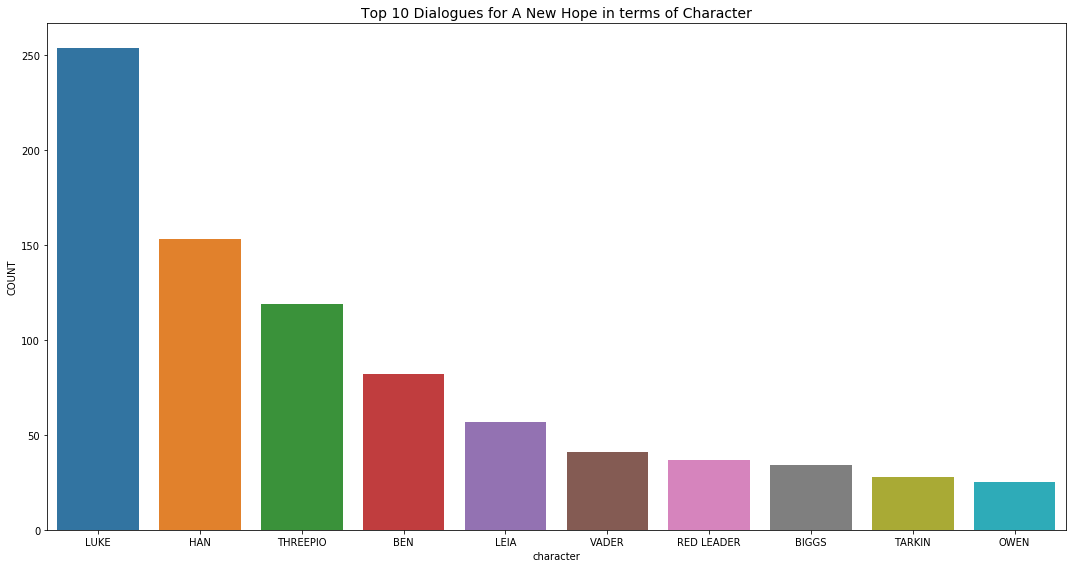

In [27]:
plt.figure(figsize=(15,8))

starwars_df_episode_A_New_Hope = starwars_df[starwars_df["episode"] == "A New Hope"]
starwars_df_episode_A_New_Hope = starwars_df_episode_A_New_Hope.groupby("character")["index"].count()
starwars_df_episode_A_New_Hope = starwars_df_episode_A_New_Hope.sort_values(ascending=False)
starwars_df_episode_A_New_Hope = starwars_df_episode_A_New_Hope.head(10)
starwars_df_episode_A_New_Hope = starwars_df_episode_A_New_Hope.to_frame()
starwars_df_episode_A_New_Hope = starwars_df_episode_A_New_Hope.reset_index()

starwars_df_episode_A_New_Hope = starwars_df_episode_A_New_Hope.rename(columns={'index':'COUNT'})

sns.barplot(data = starwars_df_episode_A_New_Hope, 
            x = "character" , 
            y = 'COUNT')
plt.title("Top 10 Dialogues for A New Hope in terms of Character", fontsize = 14)
plt.xticks(rotation=0)
plt.savefig('images/image1.png', bbox_inches = "tight") # bbox_inches = "tight" -> fit x label named for "Character" into image to show the label
plt.tight_layout()
plt.show();

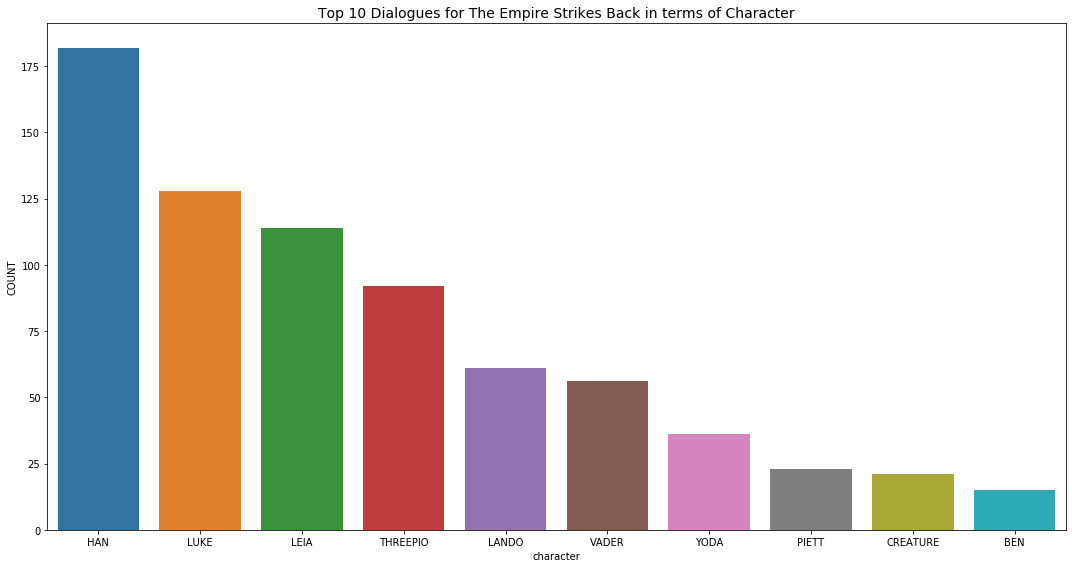

In [28]:
plt.figure(figsize=(15,8))

starwars_df_episode_The_Empire_Strikes_Back = starwars_df[starwars_df["episode"] == "The Empire Strikes Back"]
starwars_df_episode_The_Empire_Strikes_Back = starwars_df_episode_The_Empire_Strikes_Back.groupby("character")["index"].count()
starwars_df_episode_The_Empire_Strikes_Back = starwars_df_episode_The_Empire_Strikes_Back.sort_values(ascending=False)
starwars_df_episode_The_Empire_Strikes_Back = starwars_df_episode_The_Empire_Strikes_Back.head(10)
starwars_df_episode_The_Empire_Strikes_Back = starwars_df_episode_The_Empire_Strikes_Back.to_frame()
starwars_df_episode_The_Empire_Strikes_Back = starwars_df_episode_The_Empire_Strikes_Back.reset_index()

starwars_df_episode_The_Empire_Strikes_Back = starwars_df_episode_The_Empire_Strikes_Back.rename(columns={'index':'COUNT'})

sns.barplot(data = starwars_df_episode_The_Empire_Strikes_Back, 
            x = "character" , 
            y = 'COUNT')
plt.title("Top 10 Dialogues for The Empire Strikes Back in terms of Character", fontsize = 14)
plt.xticks(rotation=0)
plt.savefig('images/image2.png', bbox_inches = "tight") # bbox_inches = "tight" -> fit x label named for "Character" into image to show the label
plt.tight_layout()

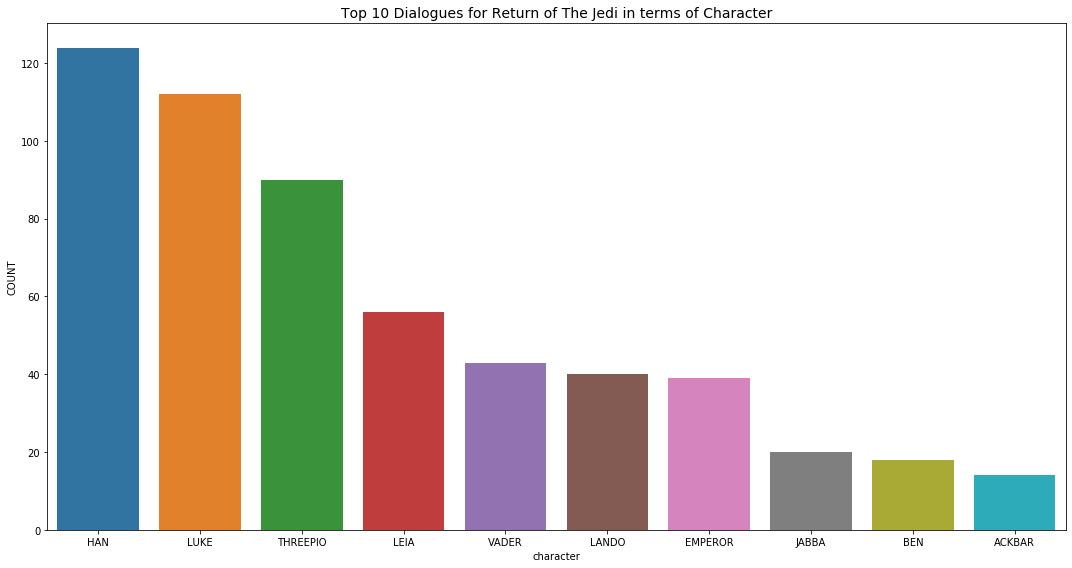

In [29]:
plt.figure(figsize=(15,8))

starwars_df_episode_A_New_Hope_Return_of_The_Jedi = starwars_df[starwars_df["episode"] == "Return of The Jedi"]
starwars_df_episode_A_New_Hope_Return_of_The_Jedi = starwars_df_episode_A_New_Hope_Return_of_The_Jedi.groupby("character")["index"].count()
starwars_df_episode_A_New_Hope_Return_of_The_Jedi = starwars_df_episode_A_New_Hope_Return_of_The_Jedi.sort_values(ascending=False)
starwars_df_episode_A_New_Hope_Return_of_The_Jedi = starwars_df_episode_A_New_Hope_Return_of_The_Jedi.head(10)
starwars_df_episode_A_New_Hope_Return_of_The_Jedi = starwars_df_episode_A_New_Hope_Return_of_The_Jedi.to_frame()
starwars_df_episode_A_New_Hope_Return_of_The_Jedi = starwars_df_episode_A_New_Hope_Return_of_The_Jedi.reset_index()

starwars_df_episode_A_New_Hope_Return_of_The_Jedi = starwars_df_episode_A_New_Hope_Return_of_The_Jedi.rename(columns={'index':'COUNT'})

sns.barplot(data = starwars_df_episode_A_New_Hope_Return_of_The_Jedi, 
            x = "character" , 
            y = 'COUNT')
plt.title("Top 10 Dialogues for Return of The Jedi in terms of Character", fontsize = 14)
plt.xticks(rotation=0)
plt.savefig('images/image3.png', bbox_inches = "tight") # bbox_inches = "tight" -> fit x label named for "Character" into image to show the label
plt.tight_layout()

13 - Define description list for dialogue_script to get more reasonable words

In [30]:
description_list = []
for description in starwars_df.dialogue_script:
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower() 
    description = nltk.word_tokenize(description)
    description = [ word for word in description if not word in set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    description = [ lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list.append(description)

In [31]:
starwars_df["words_list"]=description_list
starwars_df

,index,character,dialogue_script,episode,words_list
0,0,THREEPIO,Did you hear that? They've shut down the main...,A New Hope,hear shut main reactor destroyed sure madness
1,1,THREEPIO,We're doomed!,A New Hope,doomed
2,2,THREEPIO,There'll be no escape for the Princess this time.,A New Hope,escape princess time
3,3,THREEPIO,What's that?,A New Hope,
4,4,THREEPIO,I should have known better than to trust the l...,A New Hope,known better trust logic half sized thermocaps...
...,...,...,...,...,...
2518,2518,LANDO,"Wedge, I don't think we're going to make it.",Return of The Jedi,wedge think going make
2519,2519,WEDGE,You'll make it. Just follow me Gold Leader.,Return of The Jedi,make follow gold leader
2520,2520,LANDO,I promised to return his ship without a scratc...,Return of The Jedi,promised return ship without scratch sure hope...
2521,2521,HAN,Lando...,Return of The Jedi,lando


14 - A New Hope WordCloud

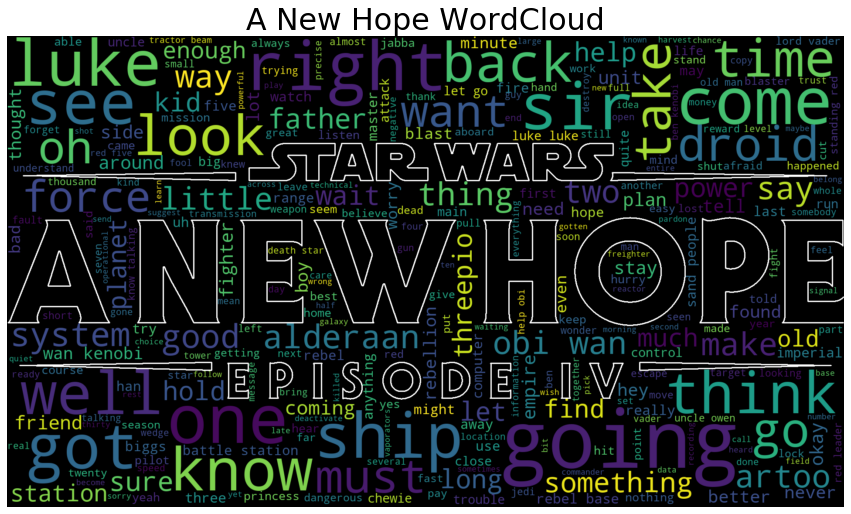

In [32]:
plt.figure(figsize=[15, 15])

starwars_df_episode_A_New_Hope = starwars_df[starwars_df["episode"] == "A New Hope"]

image = Image.open("images/a_new_hope.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)

wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black',  
                      max_words =300,
                      mask=char_mask,
                      contour_width=3, 
                      contour_color='white',
                      random_state=42).generate(' '.join(starwars_df_episode_A_New_Hope['words_list'].unique()))

image_colors = ImageColorGenerator(np.array(image))
#wordcloud.recolor(color_func=image_colors)


plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.title('A New Hope WordCloud',fontsize = 30)
plt.savefig('images/image4.png')
plt.show()

15 - The Empire Strike Back WordCloud

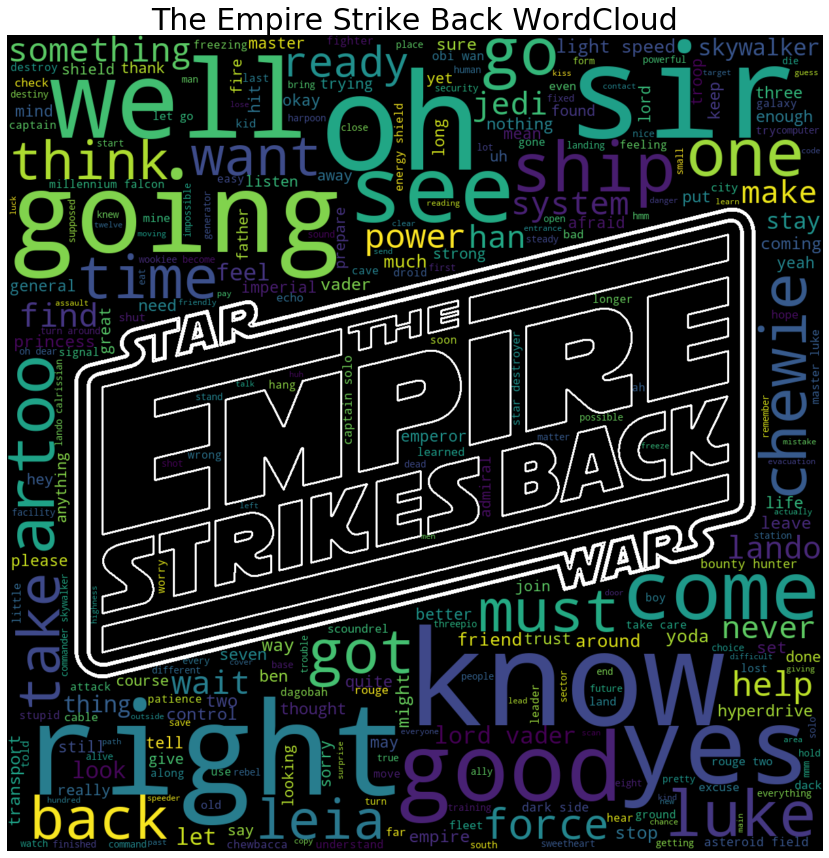

In [33]:
plt.figure(figsize=[15, 15])

starwars_df_episode_The_Empire_Strikes_Back = starwars_df[starwars_df["episode"] == "The Empire Strikes Back"]

image = Image.open("images/empire-strikes-back.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)

wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black',  
                      max_words =300,
                      mask=char_mask,
                      contour_width=3, 
                      contour_color='white',
                      random_state=42).generate(' '.join(starwars_df_episode_The_Empire_Strikes_Back['words_list'].unique()))

image_colors = ImageColorGenerator(np.array(image))
#wordcloud.recolor(color_func=image_colors)


plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.title('The Empire Strike Back WordCloud',fontsize = 30)
plt.savefig('images/image5.png')
plt.show()

16 - The Return of Jedi WordCloud

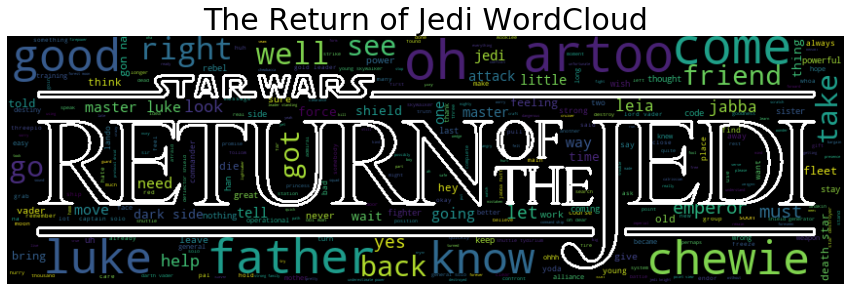

In [34]:
plt.figure(figsize=[15, 15])

starwars_df_episode_A_New_Hope_Return_of_The_Jedi = starwars_df[starwars_df["episode"] == "Return of The Jedi"]

image = Image.open("images/return-of-the-jedi.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)

wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black',  
                      max_words =300,
                      mask=char_mask,
                      contour_width=3, 
                      contour_color='white',
                      random_state=42).generate(' '.join(starwars_df_episode_A_New_Hope_Return_of_The_Jedi['words_list'].unique()))

image_colors = ImageColorGenerator(np.array(image))
#wordcloud.recolor(color_func=image_colors)


plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.title('The Return of Jedi WordCloud',fontsize = 30)
plt.savefig('images/image6.png')
plt.show()

17 - Darth Vader WordCloud

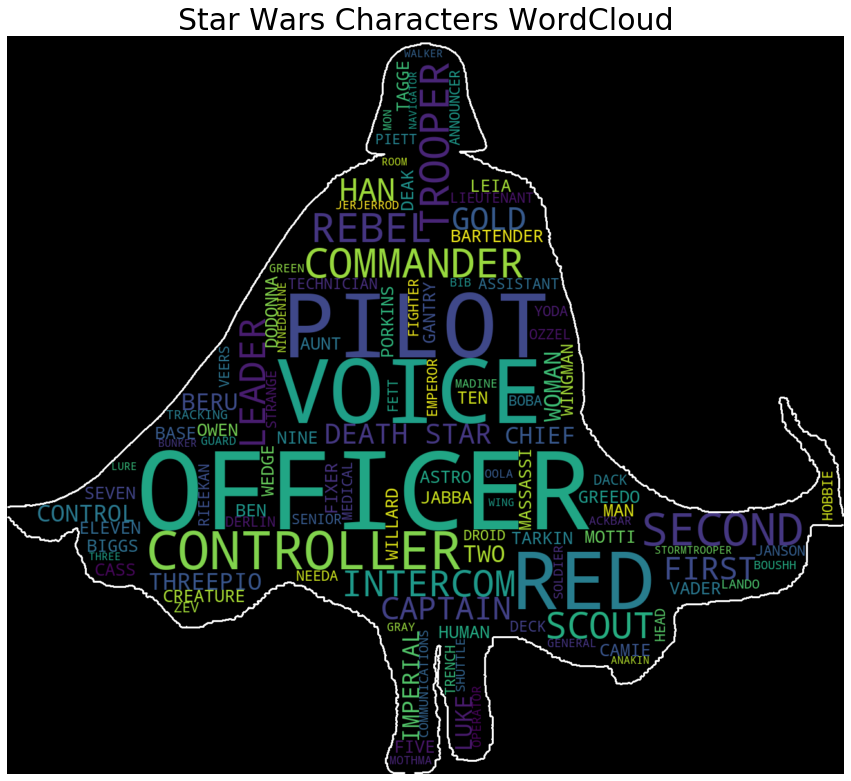

In [35]:
plt.figure(figsize=[15, 15])

image = Image.open("images/vader.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)

wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black',  
                      max_words =300,
                      mask=char_mask,
                      contour_width=3, 
                      contour_color='white',
                      random_state=42).generate(' '.join(starwars_df['character'].unique()))

image_colors = ImageColorGenerator(np.array(image))
#wordcloud.recolor(color_func=image_colors)


plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.title('Star Wars Characters WordCloud',fontsize = 30)
plt.savefig('images/image7.png')
plt.show()

18 - Star Wars Episode WordCloud

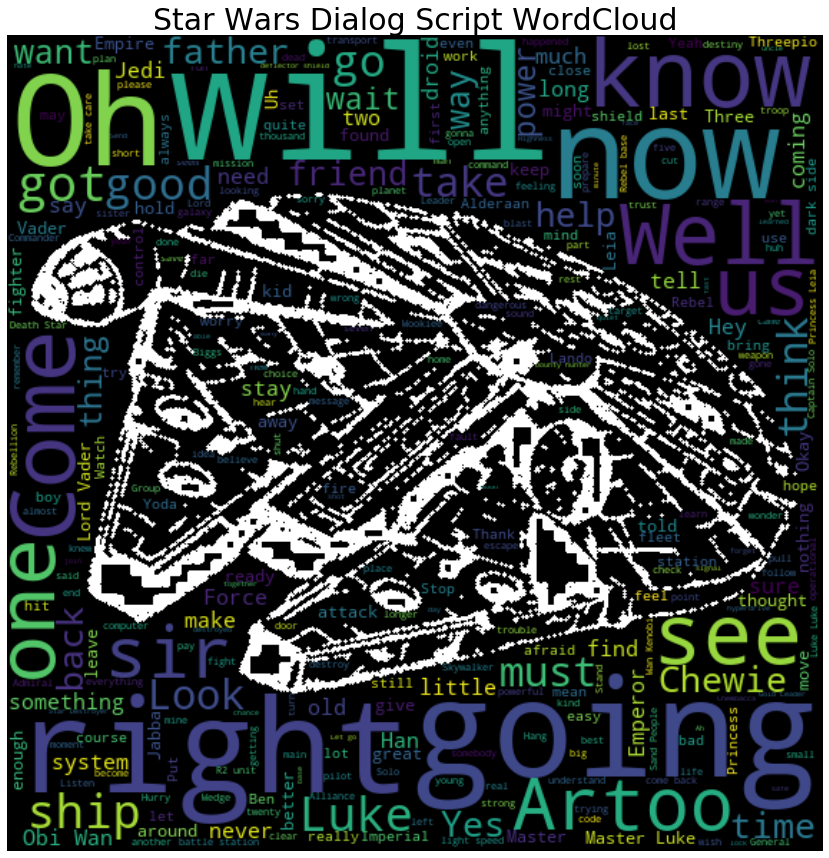

In [36]:
plt.figure(figsize=[15, 15])

image = Image.open("images/falcon.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)

wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black',  
                      max_words =300,
                      mask=char_mask,
                      contour_width=3, 
                      contour_color='white',
                      random_state=42).generate(' '.join(starwars_df['dialogue_script'].unique()))

image_colors = ImageColorGenerator(np.array(image))
#wordcloud.recolor(color_func=image_colors)


plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.title('Star Wars Dialog Script WordCloud',fontsize = 30)
plt.savefig('images/image8.png')
plt.show()

19 - Star Wars Dialog Number for Each Movie

In [37]:
starwars_df_dialog_number = starwars_df.groupby(['episode'])['dialogue_script'].count().reset_index()
starwars_df_dialog_number

,episode,dialogue_script
0,A New Hope,1010
1,Return of The Jedi,674
2,The Empire Strikes Back,839


In [38]:
for i in range(starwars_df_dialog_number.shape[0]):
    print(str(starwars_df_dialog_number['episode'][i]) +  "  "  +   str(starwars_df_dialog_number['dialogue_script'][i]))

A New Hope  1010
Return of The Jedi  674
The Empire Strikes Back  839


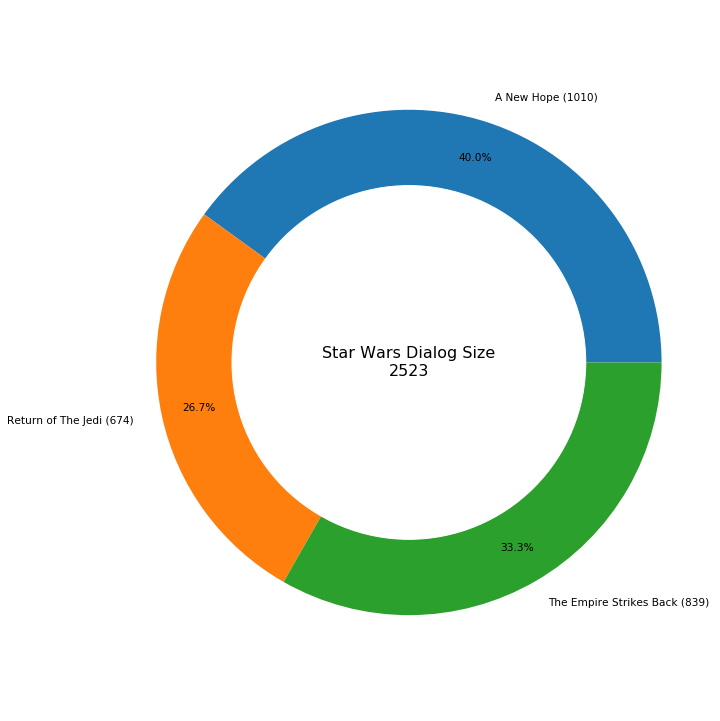

In [39]:
plt.figure(figsize=(10,13))
ax = subplot_kw=dict(aspect="equal")
my_circle = plt.Circle((0, 0), 0.7, color='white')

labels = [starwars_df_dialog_number['episode'][i] +" (" + str(starwars_df_dialog_number['dialogue_script'][i]) +") "  for i in range(starwars_df_dialog_number.shape[0])]

d = plt.pie(starwars_df_dialog_number['dialogue_script'], labels= labels,
            autopct='%1.1f%%',
            pctdistance=0.85, 
            labeldistance=1.1,
            textprops = {'fontsize':10.5})

plt.axis('equal')
plt.gca().add_artist(my_circle)

plt.text(0, 
         0, 
         "Star Wars "+ 'Dialog' + " Size\n"+str(starwars_df_dialog_number['dialogue_script'].sum()),
         horizontalalignment='center',
         verticalalignment='center',
         size=16,
        )
plt.savefig('images/image9.png')  
plt.show()